<a href="https://colab.research.google.com/github/146790g/BreakHis_InceptionResNetV2/blob/master/BreakHis_InceptionResNetV2_2_Model_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 深層学習 InceptionResNetV2モデルのファイン・チューニング法を用いた乳がん染色画像の解析
##  Deep Learning for Magnification Independent Breast Cancer Histopathology
## Image Classification

#（その２： Model Fitting）

４つのMagnification levelのデータをすべて合算して、解析する

<br>

## 4 Magnification Levels: ×40, ×100, ×200, ×400


During analysis and annotation, pathologists starts by identifying ROIs in
the lowest magnification level slide (×40), then dives deeper in the latter using higher magnification levels (×100, ×200) until having a profound insight
(×400). 

<br>

## データ数 の概要

### Training Data: 5026 images <br>
###  -- Benign Data: 1472 images <br>
###  -- Mallignant Data: 3554 images 

### Validation Data: 2904 images <br>
### -- Benign Data: 1008 images <br>
### -- Mallignant Data:1896 images <br>

## Data Set Details by Magnification levels.

 ×40 : <br>
×100 : <br>
×200 : <br>
×400 : <br>

In [ ]:
%tensorflow_version 2.x

In [ ]:
%pwd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls -lh '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data'

total 8.0K
drwx------ 2 root root 4.0K Jul 21 03:42 train
drwx------ 2 root root 4.0K Jul 27 01:49 validation


In [ ]:
from keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
import os
#import Pillow
#from PIL import Image
#import opencv
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers

from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import numpy as np
#モデル作成・学習
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Model
import tensorflow as tf
import keras
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D,Input
from keras.layers import Dense, Dropout, Flatten, Activation,GlobalAveragePooling2D,Input
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras import optimizers




#num_train = 1000              # 訓練データの画像数
#num_validation = 1000          # テストデータの画像数

img_h, img_w = 400,400
channels = 3
batch_size = 30               # ミニバッチのサイズ
train_data_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data/train' # 訓練データのフォルダー
validation_data_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/data/validation' # テストデータのフォルダー
result_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/results'        # VGG16の出力結果を保存するフォルダー
test_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/test'

train_normal_files = os.listdir(os.path.join(train_data_dir,'benign'))
train_malignant_files = os.listdir(os.path.join(train_data_dir,'malignant'))
validtion_normal_files = os.listdir(os.path.join(validation_data_dir,'benign'))
validation_malignant_files = os.listdir(os.path.join(validation_data_dir,'malignant'))
    


#第３章　InceptionResNetV2とFC層を結合したモデルの構築

##ファインチューニング法を用いる  
##InceptionResNetV2モデルのうち、７７６層以降を学習可能として、さらに、FC層は、独自で新規にモデルを構築する

In [ ]:
 ## InceptionResNetV2モデルと学習済み重みを読み込む

img_h, img_w = 400,400
channels = 3
batch_size = 30  
nb_classes = 1

# InceptionResNetV2のロード。FC層は不要なので include_top=False
input_tensor = Input(shape=(img_h, img_w, 3))
inception_v3 = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)

inception_v3.summary()

219062272/219055592 [==============================] - 2s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 199, 199, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 199, 199, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 199, 199, 32) 0           batch_normalization[0][0]        
_____________

In [ ]:
 ## InceptionResNetV2モデルと学習済み重みを読み込む

img_h, img_w = 400,400
channels = 3
batch_size = 30  
nb_classes = 1

# InceptionResNetV2のロード。FC層は不要なので include_top=False
input_tensor = Input(shape=(img_h, img_w, 3))
inception_v3 = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)


# InceptionResNetV2の一部の重みを固定（frozen）
for layer in inception_v3.layers[:775]:
    layer.trainable = False

inception_v3.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 199, 199, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 199, 199, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 199, 199, 32) 0           batch_normalization_203[0][0]    
________________________________________________________________________________

In [ ]:
## InceptionResNetV2モデルと学習済み重みを読み込む

img_h, img_w = 400,400
channels = 3
batch_size = 30  
nb_classes = 1

# InceptionResNetV2のロード。FC層は不要なので include_top=False
input_tensor = Input(shape=(img_h, img_w, 3))
inception_v3 = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)


# InceptionResNetV2の一部の重みを固定（frozen）
for layer in inception_v3.layers[:775]:
  layer.trainable = False
for layer in inception_v3.layers[775:]:
  layer.trainable = True



# FC層の作成
model = Sequential()

model.add(inception_v3)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', name='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 11, 11, 1536)      54336736  
_________________________________________________________________
flatten (Flatten)            (None, 185856)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               47579392  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
sigmoid (Dense)              (None, 1)                 257       
Total params: 101,916,385
Trainable params: 51,709,985
Non-trainable params: 50,206,400
_________________________________________________________________


In [ ]:
## モデルのコンパイル
# 最適化はRMSpropで行う
# 学習率を小さくしたのはファインチューニングを

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

#第4章　データ拡張

In [ ]:

img_h, img_w = 400,400
channels = 3
batch_size = 30               # ミニバッチのサイズ
#train_data_dir = 'content/data/train' # 訓練データのフォルダー
#validation_data_dir = 'content/data/validation' # テストデータのフォルダー
#result_dir = 'results'        # VGG16の出力結果を保存するフォルダー  


## 訓練データを読み込むジェネレーターを生成
# データ拡張を行う
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,      # 40度の範囲でランダムに回転させる
    width_shift_range=0.2,  # 横サイズの0.2の割合でランダムに水平移動
    height_shift_range=0.2, # 縦サイズの0.2の割合でランダムに垂直移動
    horizontal_flip=True,   # 水平方向にランダムに反転、左右の入れ替え
    vertical_flip=True,
    zoom_range=0.8,         # ランダムに拡大
    shear_range=0.2         # シアー変換をかける
)

# 訓練データを生成するするジェネレーター
train_generator = train_datagen.flow_from_directory(
    train_data_dir,             # 訓練データのフォルダー
    target_size=(img_h, img_w), # 画像をリサイズ
    batch_size=batch_size,      # ミニバッチのサイズ
    class_mode='binary'         # 出力層は二値のラベルが必要
)


## テストデータを読み込むジェネレーターを生成
test_datagen = ImageDataGenerator(rescale=1.0 / 255)


# テストデータを生成するするジェネレーター
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,        # テストデータのフォルダー
    target_size=(img_h, img_w), # 画像をリサイズ
    batch_size=batch_size,      # ミニバッチのサイズ
    class_mode='binary'         # 出力層は二値のラベルが必要
)

Found 5026 images belonging to 2 classes.
Found 2904 images belonging to 2 classes.


In [ ]:
type(train_generator)
print(train_generator.class_indices)
print(validation_generator.class_indices)


{'benign': 0, 'malignant': 1}
{'benign': 0, 'malignant': 1}


# 第5章　Model Fitting

### epochs=4としてみて、Model Fittingに対して、どれだけ時間がかかるかの想定をつける。今の場合には、最初のepochでは、5601秒を要して、2回目のepochでは、450秒を要することがわかる。そのため、この解析をepoch５０回繰り返すのに必要な時間は、以下のとおりとなる。

### ５６００秒＋４５０秒×５０＝２８１００秒＝４６８分２０秒

### つまり、７時間５０分程度を要することがわかる。

In [ ]:

epochs=3
num_train = 5026
num_validation = 2904


## 学習を行う

# 訓練データのジェネレーターのサイズ：168
print(len(train_generator))
# 訓練データの数をミニバッチのサイズで割った値：167
print(num_train//batch_size)
# テストデータのジェネレーターのサイズ：97
print(len(validation_generator))
# テストデータの数をミニバッチのサイズで割った値：96
print(num_validation//batch_size)

# モデルのファインチューニング
history = model.fit(
    
    # 訓練データのジェネレーター
    train_generator,
    # 各エポックにおけるステップ数として
    # 訓練データの数をミニバッチのサイズで割った値を指定
    steps_per_epoch=num_train//batch_size,
    # エポック数（学習回数）
    epochs=epochs,
    # テストデータのジェネレーター
    validation_data=validation_generator,
    # テストにおける各エポックにおけるステップ数として
    # テストデータの数をミニバッチのサイズで割った値を指定
    validation_steps=num_validation//batch_size,
)

168
167
97
96
Epoch 1/3
167/167 [==============================] - 325s 2s/step - loss: 0.3342 - accuracy: 0.8609 - val_loss: 0.4083 - val_accuracy: 0.8524
Epoch 2/3
167/167 [==============================] - 325s 2s/step - loss: 0.3273 - accuracy: 0.8657 - val_loss: 0.4159 - val_accuracy: 0.8396
Epoch 3/3
167/167 [==============================] - 330s 2s/step - loss: 0.3186 - accuracy: 0.8669 - val_loss: 0.3619 - val_accuracy: 0.8601


In [ ]:
# 処理前の時刻
import time
t1 = time.time() 
 
# 計測したい処理
for i in range(1000000):
    i ** 10
 
# 処理後の時刻
t2 = time.time()
 
# 経過時間を表示
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

経過時間：0.3795757293701172


### 次に、epochを５０回として、やってみる

In [ ]:


epochs=50
num_train = 5026
num_validation = 2904

## 学習を行う

# 訓練データのジェネレーターのサイズ：164
print(len(train_generator))
# 訓練データの数をミニバッチのサイズで割った値：163
print(num_train//batch_size)
# テストデータのジェネレーターのサイズ：20
print(len(validation_generator))
# テストデータの数をミニバッチのサイズで割った値：19
print(num_validation//batch_size)

import time
t1 = time.time() 


# モデルのファインチューニング
history = model.fit(
    
    # 訓練データのジェネレーター
    train_generator,
    # 各エポックにおけるステップ数として
    # 訓練データの数をミニバッチのサイズで割った値を指定
    steps_per_epoch=num_train//batch_size,
    # エポック数（学習回数）
    epochs=epochs,
    # テストデータのジェネレーター
    validation_data=validation_generator,
    # テストにおける各エポックにおけるステップ数として
    # テストデータの数をミニバッチのサイズで割った値を指定
    validation_steps=num_validation//batch_size
)

# 処理後の時刻
t2 = time.time()
# 経過時間を表示
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

168
167
97
96
Epoch 1/50
167/167 [==============================] - 3465s 21s/step - loss: 0.5895 - accuracy: 0.7264 - val_loss: 0.5999 - val_accuracy: 0.7007
Epoch 2/50
167/167 [==============================] - 330s 2s/step - loss: 0.5125 - accuracy: 0.7644 - val_loss: 0.5522 - val_accuracy: 0.7319
Epoch 3/50
167/167 [==============================] - 326s 2s/step - loss: 0.4927 - accuracy: 0.7766 - val_loss: 0.4735 - val_accuracy: 0.7670
Epoch 4/50
167/167 [==============================] - 319s 2s/step - loss: 0.4608 - accuracy: 0.7982 - val_loss: 0.5403 - val_accuracy: 0.7403
Epoch 5/50
167/167 [==============================] - 319s 2s/step - loss: 0.4521 - accuracy: 0.7990 - val_loss: 0.4429 - val_accuracy: 0.7951
Epoch 6/50
167/167 [==============================] - 321s 2s/step - loss: 0.4371 - accuracy: 0.8070 - val_loss: 0.4693 - val_accuracy: 0.7854
Epoch 7/50
167/167 [==============================] - 321s 2s/step - loss: 0.4253 - accuracy: 0.8157 - val_loss: 0.4660 - val_

In [ ]:
%%timeit

epochs=4
num_train = 5026
num_validation = 2904

## 学習を行う

# 訓練データのジェネレーターのサイズ：164
print(len(train_generator))
# 訓練データの数をミニバッチのサイズで割った値：163
print(num_train//batch_size)
# テストデータのジェネレーターのサイズ：20
print(len(validation_generator))
# テストデータの数をミニバッチのサイズで割った値：19
print(num_validation//batch_size)

# モデルのファインチューニング
history = model.fit(
    
    # 訓練データのジェネレーター
    train_generator,
    # 各エポックにおけるステップ数として
    # 訓練データの数をミニバッチのサイズで割った値を指定
    steps_per_epoch=num_train//batch_size,
    # エポック数（学習回数）
    epochs=epochs,
    # テストデータのジェネレーター
    validation_data=validation_generator,
    # テストにおける各エポックにおけるステップ数として
    # テストデータの数をミニバッチのサイズで割った値を指定
    validation_steps=num_validation//batch_size
)

168
167
97
96
Epoch 1/4
167/167 [==============================] - 334s 2s/step - loss: 0.2506 - accuracy: 0.9053 - val_loss: 0.4441 - val_accuracy: 0.8792
Epoch 2/4
167/167 [==============================] - 323s 2s/step - loss: 0.2720 - accuracy: 0.9035 - val_loss: 0.4691 - val_accuracy: 0.8753
Epoch 3/4
167/167 [==============================] - 318s 2s/step - loss: 0.2579 - accuracy: 0.9055 - val_loss: 0.5737 - val_accuracy: 0.8458
Epoch 4/4
167/167 [==============================] - 324s 2s/step - loss: 0.2424 - accuracy: 0.9113 - val_loss: 0.4994 - val_accuracy: 0.8726
168
167
97
96
Epoch 1/4
167/167 [==============================] - 321s 2s/step - loss: 0.2743 - accuracy: 0.8973 - val_loss: 0.4374 - val_accuracy: 0.8712
Epoch 2/4
167/167 [==============================] - 318s 2s/step - loss: 0.2508 - accuracy: 0.9039 - val_loss: 0.4692 - val_accuracy: 0.8778
Epoch 3/4
167/167 [==============================] - 317s 2s/step - loss: 0.2506 - accuracy: 0.9055 - val_loss: 0.5464 -

In [ ]:
result_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis/results'  


with open(os.path.join(result_dir,'breakhis_InceptionResNetV2.json'),'w') as json_file:
  json_file.write(model.to_json())


# model save
model.save(os.path.join(result_dir,'breakhis_InceptionResNetV2.h5'))

import pandas as pd

df_history=pd.DataFrame(history.history)

df_history.to_pickle(os.path.join(result_dir,'InceptionResNetV2_history.pkl'))



NameError: ignored

In [ ]:
type(history)
history.history
print(history.history)


{'loss': [0.5894996523857117, 0.5125049352645874, 0.49269822239875793, 0.46077248454093933, 0.4520924389362335, 0.43714508414268494, 0.4253147542476654, 0.42510488629341125, 0.39402520656585693, 0.39637207984924316, 0.3897171914577484, 0.38463833928108215, 0.36555981636047363, 0.36616137623786926, 0.3669227957725525, 0.352373868227005, 0.35071757435798645, 0.34993115067481995, 0.33954697847366333, 0.3483903110027313, 0.33352211117744446, 0.32679641246795654, 0.31998854875564575, 0.3267991542816162, 0.3211861252784729, 0.32011446356773376, 0.30259954929351807, 0.3050953447818756, 0.2911319434642792, 0.31430456042289734, 0.2877223491668701, 0.28136783838272095, 0.28525272011756897, 0.292602002620697, 0.2800367772579193, 0.27420511841773987, 0.2694687843322754, 0.2716052532196045, 0.2709949314594269, 0.2821780741214752, 0.2703358232975006, 0.28148022294044495, 0.2813996374607086, 0.26060497760772705, 0.26659050583839417, 0.26084303855895996, 0.26351359486579895, 0.2766171395778656, 0.2525

In [ ]:
np.mean(history.history['accuracy'][48:50])

0.9043234586715698

In [ ]:
np.mean(history.history['val_accuracy'][48:50])

0.8645833134651184

##【考察】
epochが、48番から50番までの精度の平均値を算出すると、  
訓練データ：精度：90.43 ％  
テストデータ：精度：86.46％  
であった。
 このことから、このInceptionResNetV2モデルのファインチューニング法により構築されたモデルは、十分に妥当であると考えられる。

##第６章　モデルの評価

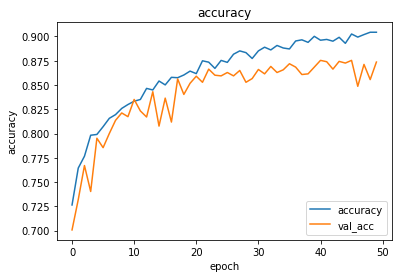

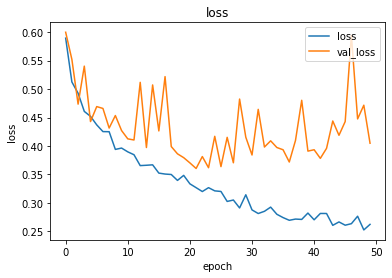

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_acc_loss(history):
    # 精度の推移をプロット
    plt.plot(history.history['accuracy'],"-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"-",label="val_acc")
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の推移をプロット
    plt.plot(history.history['loss'],"-",label="loss",)
    plt.plot(history.history['val_loss'],"-",label="val_loss")
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    
# 損失と精度をグラフに出力
plot_acc_loss(history)